## Soybean Seed Quality Classification Using Support Vector Machine  

### Library

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sklearn.metrics as metric
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Show Data

In [2]:
filedata='Biji_Kedelai.csv'
df=pd.read_csv(filedata)
df

,Red,Green,Blue,r1,r2,r3,r4,kelas
0,60.413580,92.943673,95.759259,4.0,38.0,20.0,29.0,0
1,71.279789,113.745098,115.582202,26.0,19.0,14.0,17.0,0
2,75.804762,111.902381,116.217857,5.0,37.0,15.0,22.0,0
3,64.324604,86.987998,90.010366,30.0,19.0,18.0,16.0,0
4,70.899802,92.508240,93.586684,26.0,17.0,16.0,21.0,0
5,91.297059,117.679902,119.151471,15.0,29.0,27.0,28.0,0
6,93.840035,124.282343,128.722902,6.0,34.0,15.0,24.0,0
7,101.726950,125.541844,126.467376,9.0,27.0,34.0,30.0,0
8,84.408638,116.194352,115.052326,9.0,34.0,20.0,19.0,0
9,81.671242,113.065359,115.943137,14.0,30.0,22.0,19.0,0


In [3]:
df.head()

,Red,Green,Blue,r1,r2,r3,r4,kelas
0,60.413580,92.943673,95.759259,4.0,38.0,20.0,29.0,0
1,71.279789,113.745098,115.582202,26.0,19.0,14.0,17.0,0
2,75.804762,111.902381,116.217857,5.0,37.0,15.0,22.0,0
3,64.324604,86.987998,90.010366,30.0,19.0,18.0,16.0,0
4,70.899802,92.508240,93.586684,26.0,17.0,16.0,21.0,0


In [4]:
df.tail()

,Red,Green,Blue,r1,r2,r3,r4,kelas
95,88.639006,120.306025,128.724101,23.0,24.0,21.0,21.0,1
96,78.506715,111.109504,122.189050,22.0,25.0,24.0,20.0,1
97,104.183240,137.963102,146.510319,24.0,19.0,18.0,21.0,1
98,86.400697,117.427410,126.209640,24.0,23.0,18.0,21.0,1
99,76.304255,112.978014,120.963830,12.0,38.0,18.0,19.0,1


### Data X_training & y_training

In [5]:
X = df.drop('kelas', axis=1)
X

,Red,Green,Blue,r1,r2,r3,r4
0,60.413580,92.943673,95.759259,4.0,38.0,20.0,29.0
1,71.279789,113.745098,115.582202,26.0,19.0,14.0,17.0
2,75.804762,111.902381,116.217857,5.0,37.0,15.0,22.0
3,64.324604,86.987998,90.010366,30.0,19.0,18.0,16.0
4,70.899802,92.508240,93.586684,26.0,17.0,16.0,21.0
5,91.297059,117.679902,119.151471,15.0,29.0,27.0,28.0
6,93.840035,124.282343,128.722902,6.0,34.0,15.0,24.0
7,101.726950,125.541844,126.467376,9.0,27.0,34.0,30.0
8,84.408638,116.194352,115.052326,9.0,34.0,20.0,19.0
9,81.671242,113.065359,115.943137,14.0,30.0,22.0,19.0


In [6]:
y = df['kelas']
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    1
92    1
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: kelas, Length: 100, dtype: int64

### Target Names

In [7]:
target_names=['Buruk','Baik']
target_names

['Buruk', 'Baik']

### Standard Scaller

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
df = pd.DataFrame(X, columns=['R', 'G', 'B', 'r1', 'r2', 'r3', 'r4'])
df

,R,G,B,r1,r2,r3,r4
0,-2.056128,-1.804029,-1.647815,-1.926669,1.902036,0.003876,1.343233
1,-1.198216,-0.372837,-0.464716,1.174042,-1.084632,-1.159045,-0.889287
2,-0.840959,-0.499620,-0.426778,-1.785728,1.744843,-0.965225,0.040930
3,-1.747344,-2.213795,-1.990929,1.737808,-1.084632,-0.383764,-1.075331
4,-1.228217,-1.833988,-1.777482,1.174042,-1.399018,-0.771405,-0.145114
5,0.382194,-0.102112,-0.251690,-0.376314,0.487299,1.360618,1.157190
6,0.582967,0.352153,0.319565,-1.644786,1.273264,-0.965225,0.413016
7,1.205657,0.438810,0.184948,-1.221962,0.172912,2.717360,1.529277
8,-0.161663,-0.204322,-0.496341,-1.221962,1.273264,0.003876,-0.517201
9,-0.377787,-0.419604,-0.443174,-0.517255,0.644492,0.391517,-0.517201


### Split KFold & SVM Method

KFold =  1
Train Index :  [ 0  1  3  4  5  6  7  8  9 11 12 15 17 18 19 21 22 23 25 27 28 30 31 32
 33 34 36 38 39 40 42 44 45 46 48 49 50 51 52 55 56 57 58 59 60 61 62 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 98 99] 

Test Index:  [ 2 10 13 14 16 20 24 26 29 35 37 41 43 47 53 54 63 95 96 97]
Metode SVM 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Support Vector : [15 13]
Data Prediksi :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Data Aktual :
 2     0
10    0
13    0
14    0
16    0
20    0
24    0
26    0
29    0
35    0
37    0
41    0
43    0
47    0
53    1
54    1
63    1
95    1
96    1
97    1
Name: kelas, dtype: int64
              precision    recall  f1-score   support

       Buruk       1.00      0.93      0.96   

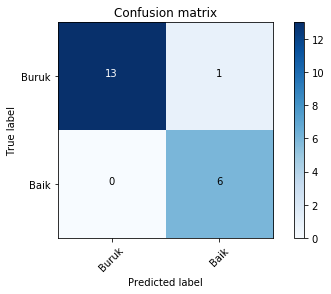

KFold =  2
Train Index :  [ 0  1  2  3  6  8  9 10 11 12 13 14 15 16 17 20 21 22 23 24 25 26 28 29
 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 63 64 66 67 68 69 72 73 74 77 79 82 83 84 86 87 89 90 91
 92 93 94 95 96 97 98 99] 

Test Index:  [ 4  5  7 18 19 27 39 60 61 62 65 70 71 75 76 78 80 81 85 88]
Metode SVM 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Support Vector : [13 13]
Data Prediksi :
 [0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Data Aktual :
 4     0
5     0
7     0
18    0
19    0
27    0
39    0
60    1
61    1
62    1
65    1
70    1
71    1
75    1
76    1
78    1
80    1
81    1
85    1
88    1
Name: kelas, dtype: int64
              precision    recall  f1-score   support

       Buruk       1.00      0.86      0.92   

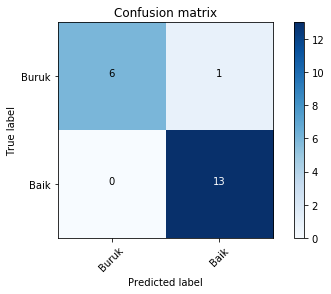

KFold =  3
Train Index :  [ 0  1  2  3  4  5  7  8  9 10 13 14 16 18 19 20 21 24 26 27 28 29 30 32
 33 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 52 53 54 55 56 57 58 60
 61 62 63 64 65 66 67 69 70 71 72 73 74 75 76 78 79 80 81 84 85 87 88 89
 90 91 93 95 96 97 98 99] 

Test Index:  [ 6 11 12 15 17 22 23 25 31 34 48 51 59 68 77 82 83 86 92 94]
Metode SVM 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Support Vector : [13 14]
Data Prediksi :
 [0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Data Aktual :
 6     0
11    0
12    0
15    0
17    0
22    0
23    0
25    0
31    0
34    0
48    0
51    1
59    1
68    1
77    1
82    1
83    1
86    1
92    1
94    1
Name: kelas, dtype: int64
              precision    recall  f1-score   support

       Buruk       1.00      0.91      0.95   

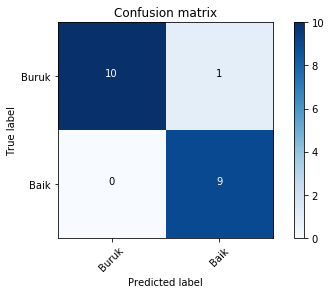

KFold =  4
Train Index :  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 29 31 34 35 36 37 38 39 41 43 44 46 47 48 50 51 52 53 54 55 57 58
 59 60 61 62 63 65 68 69 70 71 72 75 76 77 78 80 81 82 83 85 86 87 88 89
 90 92 93 94 95 96 97 98] 

Test Index:  [ 8 21 28 30 32 33 40 42 45 49 56 64 66 67 73 74 79 84 91 99]
Metode SVM 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Support Vector : [14 14]
Data Prediksi :
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1]
Data Aktual :
 8     0
21    0
28    0
30    0
32    0
33    0
40    0
42    0
45    0
49    0
56    1
64    1
66    1
67    1
73    1
74    1
79    1
84    1
91    1
99    1
Name: kelas, dtype: int64
              precision    recall  f1-score   support

       Buruk       0.91      1.00      0.95   

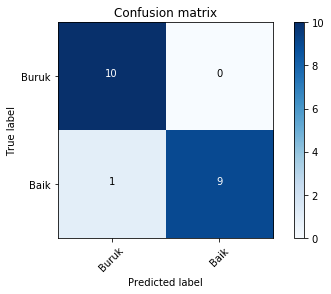

KFold =  5
Train Index :  [ 2  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 37 39 40 41 42 43 45 47 48 49 51 53 54 56 59 60
 61 62 63 64 65 66 67 68 70 71 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 88 91 92 94 95 96 97 99] 

Test Index:  [ 0  1  3  9 36 38 44 46 50 52 55 57 58 69 72 87 89 90 93 98]
Metode SVM 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Support Vector : [12 12]
Data Prediksi :
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Data Aktual :
 0     0
1     0
3     0
9     0
36    0
38    0
44    0
46    0
50    1
52    1
55    1
57    1
58    1
69    1
72    1
87    1
89    1
90    1
93    1
98    1
Name: kelas, dtype: int64
              precision    recall  f1-score   support

       Buruk       1.00      1.00      1.00   

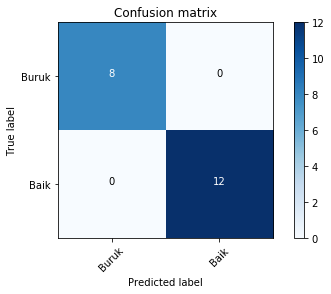

Avg akurasi Kualitas Biji Kedelai : 0.96
Avg f1score Kualitas Biji Kedelai : 0.9561553456290299


In [9]:
#Split KFold
cv = KFold(n_splits=5, random_state=4, shuffle=True)
acc_final = []
f1score_final = []
number = 1
for train_index, test_index in cv.split(X):
    print("KFold = ", number)
    number = number+1
    print("Train Index : ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    #Method SVM Linier
    svc = SVC(kernel='linear').fit(X_train,y_train) 
    svm = svc.n_support_
    #Menentukan data prediksi dan aktual
    y_pred = svc.predict(X_test)
    y_true = y_test
    
    #Mencari nilai akurasi,f1-score dll dengan membandingkan data aktual dan data prediksi dengan confusion matrix
    akurasi = metric.accuracy_score(y_true, y_pred)
    f1score = metric.f1_score(y_true, y_pred)
    cnf_matrix = metric.confusion_matrix(y_true, y_pred)
    precision = metric.precision_score(y_true, y_pred)
    recall = metric.recall_score(y_true, y_pred)
    
    acc_final.append(akurasi)
    f1score_final.append(f1score)
    
    print("Metode SVM \n", svc)
    print("Support Vector :", svm)
    print("Data Prediksi :\n", y_pred)
    print("Data Aktual :\n", y_true)
    
    print(metric.classification_report(y_true, y_pred, target_names=target_names))
    print("Akurasi :", akurasi) 
    print("Precision :", precision)
    print("Recall :", recall) 
    print("f1score :", f1score) 
    print("Confusion Matrix :\n", cnf_matrix)
    
    import itertools

    # code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False)
    plt.show()
       
Akurasi = np.array(acc_final)
F1score = np.array(f1score_final)
avg_acc = Akurasi.mean()
avg_f1 = F1score.mean()
   
print("Avg akurasi Kualitas Biji Kedelai :", avg_acc)
print("Avg f1score Kualitas Biji Kedelai :", avg_f1)